In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
HappinessData=pd.read_excel('WHRDATA\WHR2015-21.xlsx') # Import HappinessData

In [3]:
len(HappinessData) 

1084

In [4]:
HappinessData.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [5]:
CountryList=[x for x in HappinessData['Country'].unique()] #CreateList of Countires with HappinessData
len(CountryList)

166

In [6]:
WHRYears=[x for x in HappinessData['Year'].unique()] #CreateList of Years with HappinessData
WHRYears

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [7]:
CPIData=pd.read_csv('UN_Consumer Price Index.csv',skiprows=1) #Import csv file
CPIData.columns=['Region','Country','Year','Type','Value','Footnotes','Source'] #Provide header/columns to DataFrame
len(CPIData)

2062

In [77]:
CPIData.head()

,Region,Country,Year,Type,Value,Footnotes,Source
0,4,Afghanistan,2005,Consumer price index: General,71.5821,NaN,"United Nations Statistics Division (UNSD), New..."
1,4,Afghanistan,2010,Consumer price index: General,100.0000,NaN,"United Nations Statistics Division (UNSD), New..."
2,4,Afghanistan,2015,Consumer price index: General,132.8832,NaN,"United Nations Statistics Division (UNSD), New..."
3,4,Afghanistan,2017,Consumer price index: General,145.6107,NaN,"United Nations Statistics Division (UNSD), New..."
4,4,Afghanistan,2015,Consumer price index: Food,100.8219,Estimate.,"United Nations Statistics Division (UNSD), New..."


In [22]:
CPIData['Country'].sort_values().unique() #List Unique Countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Curaçao', 'Cyprus', 'Czechia', 'Côte d’Ivoire', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'G

In [12]:
#Cleanup Country Names,replace as per Happiness Data Country Names
CPIData.replace('Bolivia (Plurin. State of)','Bolivia',inplace=True)
CPIData.replace(['China, Hong Kong SAR', 'China, Macao SAR'],'Hong Kong',inplace=True)
CPIData.replace('Congo','Congo (Brazzaville)',inplace=True)
CPIData.replace('Dem. Rep. of the Congo','Congo (Kinshasa)',inplace=True)
CPIData.replace('Iran (Islamic Republic of)','Iran',inplace=True)

In [21]:
#Cleanup Country Names,replace as per Happiness Data Country Names
CPIData.replace("Lao People's Dem. Rep.","Laos",inplace=True)
CPIData.replace("Republic of Moldova","Moldova",inplace=True)
CPIData.replace("Russian Federation","Russia",inplace=True)
CPIData.replace("State of Palestine","Palestinian Territories",inplace=True)
CPIData.replace("Syrian Arab Republic","Syria",inplace=True)
CPIData.replace("United Rep. of Tanzania","Tanzania",inplace=True)
CPIData.replace("Venezuela (Boliv. Rep. of)","Venezuela",inplace=True)
CPIData.replace("Viet Nam","Vietnam",inplace=True)

In [23]:
CPIData['Type'].unique() #Types of Consumer Price Index

array(['Consumer price index: General', 'Consumer price index: Food'],
      dtype=object)

In [24]:
#Filter CPI data for Countires and Years in Happiness Data
CPIData=CPIData[(CPIData['Country'].isin(CountryList))&(CPIData['Year'].isin(WHRYears))]

In [25]:
len(CPIData)

1034

In [26]:
#Only Analyze Consumer Food Prices
CPIData=CPIData[CPIData['Type']=='Consumer price index: Food']

In [27]:
len(CPIData)

482

In [28]:
CPIData=CPIData[['Country','Year','Value']] #Consider only Country Year and CPI values.

In [29]:
CPIData.reset_index(drop=True,inplace=True) # Reset Index

In [30]:
CPIData.head()

,Country,Year,Value
0,Afghanistan,2015,100.8219
1,Afghanistan,2017,113.9270
2,Albania,2015,118.8192
3,Albania,2017,127.3438
4,Albania,2018,130.7555


In [31]:
list(CPIData['Year'].unique()) #Unique Years for Which CPI data is available

[2015, 2017, 2018, 2019]

In [32]:
#Restrict Happines Data to the years for which CPI data is available
#Consider Country,Year and Rank columns only
HappinessData=HappinessData[HappinessData['Year'].isin(list(CPIData['Year'].unique()))][['Country','Year','Rank']]
len(HappinessData)

625

In [36]:
HappinessData.head()

,Country,Year,Rank
0,Switzerland,2015,1
1,Iceland,2015,2
2,Denmark,2015,3
3,Norway,2015,4
4,Canada,2015,5


In [37]:
#Merge Happiness Data with CPI data based on Country and Year
CombineData= pd.merge(CPIData,HappinessData,on=['Country','Year']) #Merge both the DataFrames on COuntry and Year
CombineData.head()

,Country,Year,Value,Rank
0,Afghanistan,2015,100.8219,153
1,Afghanistan,2017,113.9270,141
2,Albania,2015,118.8192,95
3,Albania,2017,127.3438,109
4,Albania,2018,130.7555,112


In [38]:
len(CombineData)

464

In [39]:
#Calculate relation between Happiness Rank and Food Price index
model=linregress(CombineData['Rank'],CombineData['Value'])
model

LinregressResult(slope=2.114845814440782, intercept=90.16281028250503, rvalue=0.05530988360431994, pvalue=0.23439711195968949, stderr=1.7761910050624654, intercept_stderr=148.40363207800772)

The r-value is: 0.0030591832243234197


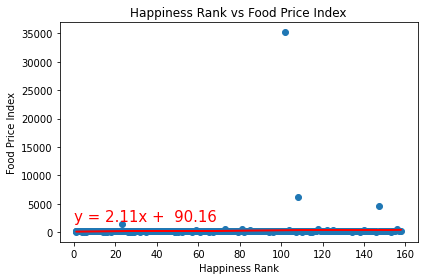

In [45]:
regressvalues=CombineData['Rank']*model[0]+model[1] #Calculate Linear Regression
line_eq= f"y = {str(round(model[0],2))}x +  {str(round(model[1],2))}"
print(f"The r-value is: {model[2]**2}") #Print Rvalue
plt.title('Happiness Rank vs Food Price Index')
plt.scatter(CombineData['Rank'],CombineData['Value'])
plt.xlabel('Happiness Rank')
plt.ylabel('Food Price Index')
plt.plot(CombineData['Rank'],regressvalues,'red')
plt.annotate(line_eq,(0,2000),fontsize=15,color='red')
plt.tight_layout()
plt.show()
#R value of 0.00 (approx) shows that Food prices and happines index are not correlated

In [47]:
CombineData['Rank'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158], dtype=int64)

In [57]:
# Top 10 Ranks by Happiness Index
TopRanks=pd.DataFrame({'Ranks':CombineData.sort_values('Rank')['Rank'].unique()}).head(10)['Ranks']
# Bottom 10 Ranks by Happiness Index
BottomRanks=pd.DataFrame({'Ranks':CombineData.sort_values('Rank',ascending=False)['Rank'].unique()}).head(10)['Ranks']

In [58]:
#Data of countries at top of Happiniess Index Rank
TopCombinedData=CombineData[CombineData['Rank'].isin(TopRanks)]
#Data of countries at Bottom of Happiniess Index Rank
BottomCombinedData=CombineData[CombineData['Rank'].isin(BottomRanks)]

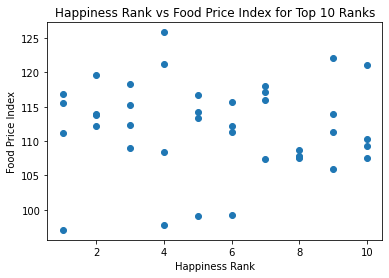

In [63]:
plt.scatter(TopCombinedData['Rank'],TopCombinedData['Value'])
plt.title('Happiness Rank vs Food Price Index for Top 10 Ranks')
plt.xlabel('Happiness Rank')
plt.ylabel('Food Price Index')
plt.show()

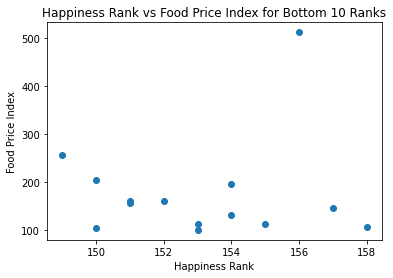

In [64]:
plt.scatter(BottomCombinedData['Rank'],BottomCombinedData['Value'])
plt.title('Happiness Rank vs Food Price Index for Bottom 10 Ranks')
plt.xlabel('Happiness Rank')
plt.ylabel('Food Price Index')
plt.show()